In [362]:
import json
import pandas as pd
import numpy as np

In [363]:
business_data = []
r_dtypes = {"business_id": str, "name": str, "city": str, "stars": np.float16, "review_count": np.int32,
            "categories": str}

drop_columns = ['address','state','postal_code','longitude','latitude','attributes','hours','is_open']

with open("yelp_academic_dataset_business.json", "r") as f:
    reader = pd.read_json(f, orient="records", lines=True, dtype = r_dtypes,chunksize=1000)
        
    for chunk in reader:
        reduced_chunk = chunk.drop(drop_columns, axis = 1)
        business_data.append(reduced_chunk)
    
business_data = pd.concat(business_data, ignore_index=True)

In [260]:
business_data.head()


,business_id,name,city,stars,review_count,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,3.0,15,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,3.5,22,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,4.5,13,"Brewpubs, Breweries, Food"


In [364]:
#dataframe containing only rows with categories that contain 'Indian'
business_data2 = business_data[business_data['categories'].str.contains('Indian')]
business_data2.head()

,business_id,name,city,stars,review_count,categories
319,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai..."
370,VeqkfRUzZAKlQer3npXPdQ,New India's Kitchen,Ballwin,4.0,130,"Restaurants, Indian, Buffets, Diners, Pakistani"
518,pJB63RaQpkTIKBhfTsLQQg,Biryani Hut,Noblesville,4.0,83,"Restaurants, Indian"
523,ngvE1G9IckUO-ljZBFo23w,Mumbai Bistro,Philadelphia,4.0,217,"Indian, Restaurants"
566,SwWfW3vBn5QkDE7T3urGAg,Persis Biryani Indian Grill,Mount Juliet,4.5,246,"Indian, Restaurants"


In [366]:
#open review data set, read it by 1000 rows, for each chunk drop certain fields, append to an array, 
#concatenate all chunks to a DataFrame
review_data = []
r_dtypes = {"stars": np.float16, "user_id": str, "business_id": str}
drop_columns = ['review_id', 'useful', 'funny', 'cool', 'text', 'date']
          
with open("yelp_academic_dataset_review.json", "r") as f:
    reader = pd.read_json(f, orient="records", lines=True, dtype=r_dtypes, chunksize=1000)
        
    for chunk in reader:
        reduced_chunk = chunk.drop(drop_columns, axis = 1)
        review_data.append(reduced_chunk)
    
review_data = pd.concat(review_data, ignore_index=True)

In [367]:
review_data.head()

,user_id,business_id,stars
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0
1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0
2,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0
3,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0
4,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0


In [368]:
#open user data set, read it by 1000 rows, for each chunk drop certain fields, append to an array, 
#concatenate all chunks to a DataFrame
user_data = []
r_dtypes = {"user_id": str, "name": str, "review_count": np.int32}

drop_columns = ["yelping_since", "useful", "funny", "cool", "elite", "friends", "fans", "average_stars", "compliment_hot", "compliment_more", "compliment_profile", "compliment_cute", "compliment_list", "compliment_note", "compliment_plain", "compliment_cool", "compliment_funny", "compliment_writer", "compliment_photos"]

with open("yelp_academic_dataset_user 2.json", "r") as f:
    reader = pd.read_json(f, orient="records", lines=True, chunksize=1000, dtype = r_dtypes)
        
    for chunk in reader:
        reduced_chunk = chunk.drop(drop_columns, axis = 1)
        user_data.append(reduced_chunk)
    
user_data = pd.concat(user_data, ignore_index=True)

In [126]:
user_data.head()

,user_id,name,review_count
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665
3,SZDeASXq7o05mMNLshsdIA,Gwen,224
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79


In [369]:
ru = pd.merge(review_data, user_data, on = 'user_id')
rub = pd.merge(business_data, ru, on = 'business_id')

In [416]:
rub

,business_id,name_x,city,stars_x,review_count_x,categories,user_id,stars_y,name_y,review_count_y
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop...",e0imecnX_9MtLnS2rUZM-A,5.0,Erin,55
1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop...",_Q0fdLVoTnlNkEypUvNkHA,5.0,S,8
2,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop...",ycUooVIDWPgXPf6niW-FWQ,4.0,KC,12
3,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop...",CiwVvb7jWijWB5jkmatzKA,5.0,Robert,14
4,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop...",QkCbMKBktkrkOFJugHvY6w,5.0,Ginger,11
...,...,...,...,...,...,...,...,...,...,...
6990242,jV_XOycEzSlTx-65W906pg,Sic Ink,Apollo beach,4.5,9,"Beauty & Spas, Permanent Makeup, Piercing, Tattoo",HHA5I-avc5ZqwwHup1FShw,5.0,Alix,7
6990243,jV_XOycEzSlTx-65W906pg,Sic Ink,Apollo beach,4.5,9,"Beauty & Spas, Permanent Makeup, Piercing, Tattoo",EYKtdSmIb48URxUagC937A,5.0,JoJo,4
6990244,jV_XOycEzSlTx-65W906pg,Sic Ink,Apollo beach,4.5,9,"Beauty & Spas, Permanent Makeup, Piercing, Tattoo",Pi1chY5ZWbQ80tjxQcrn_g,1.0,Stacey Âû,16
6990245,jV_XOycEzSlTx-65W906pg,Sic Ink,Apollo beach,4.5,9,"Beauty & Spas, Permanent Makeup, Piercing, Tattoo",CYvam-TkaaZ8AAtc77dcyw,3.0,Alyssa,6


In [372]:
#merge review data and summary1, which includes
summary = rub['user_id'].value_counts() #get how many times each user_id shows up
user_id = summary.index
num_reviews = summary.values


summary1 = pd.DataFrame(user_id, num_reviews)
summary1 = pd.DataFrame({'user_id': user_id, 'Num_reviews': num_reviews})
summary1



,user_id,Num_reviews
0,_BcWyKQL16ndpBdggh2kNA,3048
1,Xw7ZjaGfr0WNVt6s_5KZfA,1840
2,0Igx-a1wAstiBDerGxXk2A,1747
3,-G7Zkl1wIWBBmD0KRy_sCw,1682
4,ET8n-r7glWYqZhuR6GcdNw,1653
...,...,...
1987892,IlfE678_uC39PhmVLfLx3w,1
1987893,ngaHj6Wz8kcK-NtYkbeBZw,1
1987894,JoCrP1KyjNOSGqMq7E4G9g,1
1987895,3kiQban7B8PeQQSAvp6gHw,1


In [340]:
summarybusiness = pd.merge(summary1, review_data, on = 'user_id')


summarybusiness['wstar'] = ((summarybusiness['Num_reviews'] * summarybusiness['stars'])/1.3599972535017852)
summarybusiness.head()


,user_id,Num_reviews,business_id,stars,wstar
0,ppsm8EDKjA1fp1yTCP3RrQ,55,GqUv8rF5h3ZZFfj7S9tgyQ,3.0,121.323774
1,ppsm8EDKjA1fp1yTCP3RrQ,55,HPVpxcwDVjgZatc4M8bEnw,3.0,121.323774
2,ppsm8EDKjA1fp1yTCP3RrQ,55,UhSVDwQFW6mKmaEA5OTU7A,4.0,161.765033
3,ppsm8EDKjA1fp1yTCP3RrQ,55,WM3q-7scdPUei6fu4SJFYw,5.0,202.206291
4,ppsm8EDKjA1fp1yTCP3RrQ,55,yamAA4kSOegaxFjhGhI0OQ,4.0,161.765033


In [203]:
num_reviews.mean()

1.3599972535017852

In [388]:
#business_data3.to_csv(r'business_data3.csv', index = False) 
tuscon_data = pd.read_csv("business_data3.csv") #every indian restaurant in tuscon, 16
tuscon_data

,business_id,name,city,stars,review_count,categories
0,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai..."
1,lEOxwatxwXaCi8lPUTFKRQ,Indian Frybread-Manna From Heaven,Tucson,4.5,84,"Restaurants, Mexican, American (Traditional), ..."
2,LgWlFdHfW2ZD8M-2vaMULg,Kababeque Indian Grill,Tucson,3.5,229,"Indian, Kebab, Restaurants, Pakistani"
3,sczJMRhzdeHXi80lRlrGMQ,The Twisted Tandoor,Tucson,4.0,74,"Restaurants, Indian"
4,fnqBFLP47ORvStxq4lOhtg,Spice Box,Tucson,4.5,26,"Restaurants, Indian"
5,eGi7CE2YaN6YMiGyXNi8XQ,Spice Garden Indian Cuisine,Tucson,4.5,105,"Restaurants, Indian, Vegetarian"
6,JHxfEDW05_KSTfk-SLqXGw,Indian Twist,Tucson,4.5,383,"Restaurants, Indian, Seafood, Bars, Pakistani,..."
7,Sw8uw0pmocFqzBhq0AP5Bw,Yogi's Indian Cafe & Market,Tucson,4.5,75,"Ethnic Food, Herbs & Spices, Food, Restaurants..."
8,T4E23iml3us2oH_OVGBr4Q,Gandhi Cuisine of India,Tucson,4.0,194,"Food, Specialty Food, Imported Food, Indian, E..."
9,TxKaVOgzvrOxAJLFN8ju0g,Amrutha Cuisine,Tucson,2.5,17,"Indian, Pakistani, Restaurants"


In [390]:
ru1 = pd.merge(tuscon_data, review_data, on= 'business_id')  #each review for the indian restaurants in tuscon, 2824
ru1.head()
ru1

,business_id,name,city,stars_x,review_count,categories,user_id,stars_y
0,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",nabJKapjKahYfTtnBDG6JQ,4.0
1,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",SmaAK6il7pyldoqZrH7iTA,4.0
2,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",B6FbaEEn5Uh4kEqv4kUdgA,3.0
3,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",OqTs0lHg5ZXvF1S0bJfzFA,5.0
4,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",QaBNIUwzgN4v_5wjmlJOCg,4.0
...,...,...,...,...,...,...,...,...
2819,AXoq_ze4DyyPDjJk-Ba9Pw,Curry Leaf,Tucson,3.5,128,"Restaurants, Desserts, Vegetarian, Chicken Sho...",htrk75GKZU3Lsq8WjGLJJA,5.0
2820,AXoq_ze4DyyPDjJk-Ba9Pw,Curry Leaf,Tucson,3.5,128,"Restaurants, Desserts, Vegetarian, Chicken Sho...",U5QxTfc-I6H4vJDjgqEzXQ,1.0
2821,AXoq_ze4DyyPDjJk-Ba9Pw,Curry Leaf,Tucson,3.5,128,"Restaurants, Desserts, Vegetarian, Chicken Sho...",OiTs4iHDVu6PqtQ-7gBRaQ,5.0
2822,AXoq_ze4DyyPDjJk-Ba9Pw,Curry Leaf,Tucson,3.5,128,"Restaurants, Desserts, Vegetarian, Chicken Sho...",cWfjeKwR2NVeQDq5cra2Bw,4.0


In [392]:
rub1 = pd.merge(ru1, user_data, on = "user_id") #every review of every indian restaurant in tuscon
rub1


,business_id,name_x,city,stars_x,review_count_x,categories,user_id,stars_y,name_y,review_count_y
0,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",nabJKapjKahYfTtnBDG6JQ,4.0,Kinga,657
1,T4E23iml3us2oH_OVGBr4Q,Gandhi Cuisine of India,Tucson,4.0,194,"Food, Specialty Food, Imported Food, Indian, E...",nabJKapjKahYfTtnBDG6JQ,4.0,Kinga,657
2,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",SmaAK6il7pyldoqZrH7iTA,4.0,Madison,39
3,T4E23iml3us2oH_OVGBr4Q,Gandhi Cuisine of India,Tucson,4.0,194,"Food, Specialty Food, Imported Food, Indian, E...",SmaAK6il7pyldoqZrH7iTA,2.0,Madison,39
4,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",B6FbaEEn5Uh4kEqv4kUdgA,3.0,Roshni,9
...,...,...,...,...,...,...,...,...,...,...
2818,AXoq_ze4DyyPDjJk-Ba9Pw,Curry Leaf,Tucson,3.5,128,"Restaurants, Desserts, Vegetarian, Chicken Sho...",NpsNln1jAfxu756FV6ztyA,3.0,Juan,4
2819,AXoq_ze4DyyPDjJk-Ba9Pw,Curry Leaf,Tucson,3.5,128,"Restaurants, Desserts, Vegetarian, Chicken Sho...",eiZ6mJgf4fgB4-zBtpazSw,2.0,soho,47
2820,AXoq_ze4DyyPDjJk-Ba9Pw,Curry Leaf,Tucson,3.5,128,"Restaurants, Desserts, Vegetarian, Chicken Sho...",htrk75GKZU3Lsq8WjGLJJA,5.0,Susan,6
2821,AXoq_ze4DyyPDjJk-Ba9Pw,Curry Leaf,Tucson,3.5,128,"Restaurants, Desserts, Vegetarian, Chicken Sho...",U5QxTfc-I6H4vJDjgqEzXQ,1.0,Melinda,9


In [339]:
summary2.head()

I06gY9An4o81XpejLWD9DA    13
1viszljzsa8W7VnYPuWosw    12
HKIFN7bin1aKtQZ9k9tRlQ     9
jL41h4Ez98PZfqiKzbbY1w     8
EAHCCgMFoJxlOPcCPQ91SQ     7
Name: user_id, dtype: int64

In [414]:
summary2 = rub1['user_id'].value_counts()  #new weight

user_id = summary2.index
num_reviews = summary2.values


summary3 = pd.DataFrame(user_id, num_reviews)
summary3 = pd.DataFrame({'user_id': user_id, 'Num_reviews': num_reviews})
summarybusiness2 = pd.merge(summary3, rub1, on = 'user_id')

summarybusiness2

,user_id,Num_reviews,business_id,name_x,city,stars_x,review_count_x,categories,stars_y,name_y,review_count_y
0,I06gY9An4o81XpejLWD9DA,13,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",4.0,Bill,327
1,I06gY9An4o81XpejLWD9DA,13,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",4.0,Bill,327
2,I06gY9An4o81XpejLWD9DA,13,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",4.0,Bill,327
3,I06gY9An4o81XpejLWD9DA,13,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",5.0,Bill,327
4,I06gY9An4o81XpejLWD9DA,13,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",4.0,Bill,327
...,...,...,...,...,...,...,...,...,...,...,...
2818,x2qRwPFE7geYH4sAHvdJgQ,1,AXoq_ze4DyyPDjJk-Ba9Pw,Curry Leaf,Tucson,3.5,128,"Restaurants, Desserts, Vegetarian, Chicken Sho...",5.0,Charles,36
2819,Gs4OijDfrHzAbocJ-YYGog,1,AXoq_ze4DyyPDjJk-Ba9Pw,Curry Leaf,Tucson,3.5,128,"Restaurants, Desserts, Vegetarian, Chicken Sho...",3.0,Ed,18
2820,kxdXePu91_qTSPvqK2UKrQ,1,LgWlFdHfW2ZD8M-2vaMULg,Kababeque Indian Grill,Tucson,3.5,229,"Indian, Kebab, Restaurants, Pakistani",2.0,Sharon,2
2821,5P78zSCjx4qZH2eeAUYhtg,1,0VLvj_tqDWATqb9ThA-XiA,New Delhi Palace,Tucson,3.5,253,"Gluten-Free, Cocktail Bars, Indian, Nightlife,...",4.0,Mikila,6


In [394]:

summarybusiness2['wstar'] = ((summarybusiness2['Num_reviews'] * summarybusiness2['stars_y'])/1.2095115681233932)
summarybusiness2

,user_id,Num_reviews,business_id,name_x,city,stars_x,review_count_x,categories,stars_y,name_y,review_count_y,wstar
0,I06gY9An4o81XpejLWD9DA,13,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",4.0,Bill,327,42.992561
1,I06gY9An4o81XpejLWD9DA,13,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",4.0,Bill,327,42.992561
2,I06gY9An4o81XpejLWD9DA,13,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",4.0,Bill,327,42.992561
3,I06gY9An4o81XpejLWD9DA,13,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",5.0,Bill,327,53.740701
4,I06gY9An4o81XpejLWD9DA,13,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",4.0,Bill,327,42.992561
...,...,...,...,...,...,...,...,...,...,...,...,...
2818,x2qRwPFE7geYH4sAHvdJgQ,1,AXoq_ze4DyyPDjJk-Ba9Pw,Curry Leaf,Tucson,3.5,128,"Restaurants, Desserts, Vegetarian, Chicken Sho...",5.0,Charles,36,4.133900
2819,Gs4OijDfrHzAbocJ-YYGog,1,AXoq_ze4DyyPDjJk-Ba9Pw,Curry Leaf,Tucson,3.5,128,"Restaurants, Desserts, Vegetarian, Chicken Sho...",3.0,Ed,18,2.480340
2820,kxdXePu91_qTSPvqK2UKrQ,1,LgWlFdHfW2ZD8M-2vaMULg,Kababeque Indian Grill,Tucson,3.5,229,"Indian, Kebab, Restaurants, Pakistani",2.0,Sharon,2,1.653560
2821,5P78zSCjx4qZH2eeAUYhtg,1,0VLvj_tqDWATqb9ThA-XiA,New Delhi Palace,Tucson,3.5,253,"Gluten-Free, Cocktail Bars, Indian, Nightlife,...",4.0,Mikila,6,3.307120


In [309]:
num_reviews.mean()

1.2095115681233932

In [395]:
summarybusiness3 = (summarybusiness2.groupby(['name_x'])[['wstar']].mean()*5/8.081588496041224)

summarybusiness3.head()

,wstar
name_x,
Amrutha Cuisine,2.369149
Bombol,4.899506
Curry Leaf,2.420938
Gandhi Cuisine of India,3.002627
India Oven,3.082107


In [352]:
summarybusiness3['wstar'].max()

5.0

In [396]:
summarybusiness3

,wstar
name_x,
Amrutha Cuisine,2.369149
Bombol,4.899506
Curry Leaf,2.420938
Gandhi Cuisine of India,3.002627
India Oven,3.082107
Indian Frybread-Manna From Heaven,3.472657
Indian Twist,3.433599
Kababeque Indian Grill,2.509717
New Delhi Palace,2.663369


In [413]:
tuscon_data[['name','stars']]

,name,stars
0,Sher-e-Punjab,4.0
1,Indian Frybread-Manna From Heaven,4.5
2,Kababeque Indian Grill,3.5
3,The Twisted Tandoor,4.0
4,Spice Box,4.5
5,Spice Garden Indian Cuisine,4.5
6,Indian Twist,4.5
7,Yogi's Indian Cafe & Market,4.5
8,Gandhi Cuisine of India,4.0
9,Amrutha Cuisine,2.5


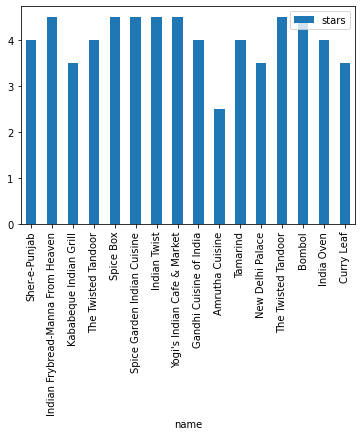

In [400]:
import matplotlib.pyplot as plt
df = pd.DataFrame(tuscon_data,columns=['name','stars'])
df.plot(x ='name', y='stars', kind = 'bar')
plt.show()

In [275]:
#summarybusiness.to_csv(r'summarybusiness.csv', index = False)


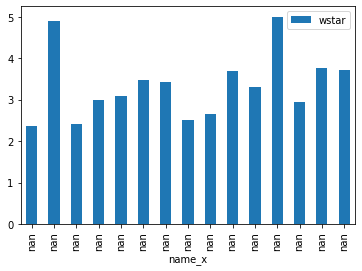

In [405]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame(summarybusiness3,columns=['name_x','wstar'])
df2.plot(x ='name_x', y='wstar', kind = 'bar')
plt.show()